# Lab 3: Evaluating Polynomials and Bisection Method

Welcome to Lab 03! Throughout the course you will complete a lab assignments like this one. You can't learn technical subjects without hands-on practice, so labs are an important part of the course.

Collaborating on labs is more than okay -- it's encouraged. You should rarely remain stuck for more than a few minutes on questions in labs, so ask a neighbor or an instructor for help. Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it. You should **not** just copy/paste someone else's code, but rather work together to gain understanding of the task you need to complete. 

In today's lab, you'll learn:

- how to write functions in Python.

- a "clever" way to evaluate polynomials.

- how to implement the bisection method for finding roots.

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**Due Date:** Tuesday, February 26, 2023 at 4:59 pm

**Collaboration Policy:** Labs are a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below**.

**Collaborators:** 

List collaborators here.

## 0. Python Functions

Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50 (no percent sign).

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Like other names we've defined, it can't start with a number or contain spaces. Let's call our function `to_percentage`:
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  A function can have any number of arguments (including 0!). 

`to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)
    
If we want our function to take more than one argument, we add a comma between each argument name. Note that if we had zero arguments, we'd still place the parentheses () after than name. 

We put a colon after the signature to tell Python it's over. If you're getting a syntax error after defining a function, check to make sure you remembered the colon!

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing an **indented** triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function and every line **must be indented with a tab**.  Any lines that are *not* indented and left-aligned with the def statement is considered outside the function. 

Some notes about the body of the function:
- We can write code that we would write anywhere else.  
- We use the arguments defined in the function signature. We can do this because we assume that when we call the function, values are already assigned to those arguments.
- We generally avoid referencing variables defined *outside* the function. If you would like to reference variables outside of the function, pass them through as arguments!


Now, let's give a name to the number we multiply a proportion by to get a percentage:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` is part of the function's body and tells Python to make the value of the function call equal to whatever comes right after `return`.  We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor
        
`return` only makes sense in the context of a function, and **can never be used outside of a function**. `return` is always the last line of the function because Python stops executing the body of a function once it hits a `return` statement.

**Note:**  `return` inside a function tells Python what value the function evaluates to. However, there are other functions, like `print`, that have no `return` value. For example, `print` simply prints a certain value out to the console. Be aware that `return` and `print` are **very** different. 

**Question 1.** Define `to_percentage` in the cell below.  Call your function to convert the proportion $0.2$ to a percentage.  Name that percentage `twenty_percent`.


In [10]:
def to_percentage(proportion):
    """converts a proportion to a percentage."""
    percentage = proportion * 100
    return percentage
twenty_percent = to_percentage(0.2)
twenty_percent

20.0

Like you've done with built-in functions in previous labs (`max`, `abs`, etc.), you can pass in named values as arguments to your function.

## 1. Horner's Method

Suppose you want to evaluate the function $p(x)=5x^4-11x^3+6x^2+7x-3$. Let's represent that polynomial as a list of coefficients: (Let's also go ahead and import math and numpy while we're at it, as they could be useful later...)


In [11]:
import math
import numpy as np

poly_coeffs=[5,-11,6,7,-3]
print( poly_coeffs )

[5, -11, 6, 7, -3]


Then one way to evaluate the polynomial at a given $x$ value is using a for loop: (in this example we let $x=2$)


In [12]:
def poly_eval(coeffs,x):
    """evaluates a polynomial at a given x-coord by multiplying coefficients by powers of x.
    coeffs is a list of coefficients such that the "leading" coeff is the first item in the list
    (thus the last item is the "constant" term)"""
    degree = len(coeffs)-1
    poly_val = 0
    for i in range(0,len(coeffs)):
        poly_val = poly_val + coeffs[i]*x**(degree-i)
    return poly_val
print( poly_eval([5,-11,6,7,-3],2) )


27


Be sure you understand how the code above works before proceeding - ask me or a neighbor if it doesn't make sense!

Another way we could evaluate a polynomial is to use a "clever" factored form. Observe:
$$p(x)=5x^4-11x^3+6x^2+7x-3 = (((5x-11)x+6)x+7)x-3 $$

Then evaluating the polynomial can be done iterating as follows:
- Start with the leading coefficient (in this example, 5).
- Multiply by $x$ then add the next coefficient (e.g. -11).
- Multiply by $x$ then add the next coefficient (e.g. 6).
- Repeat this process until you've multiplied by $x$ and added the last coefficient (e.g. -3)

Thus rather than raising $x$ to larger and larger powers, we only need to do a "multiply-then-add" for each iteration.

This method is called "Horner's Method."

**Question 2.** Write a function that uses Horner's Method to evaluate the same polynomial from above. Just like the `poly_eval` function, its input should be a list of coefficients and an $x$ value at which to evaluate the polynomial.


In [13]:
def horner(coeffs,x):
    horner = coeffs[0]
    for i in range(0,len(coeffs)-1):
        horner = horner *x+coeffs[i+1] 
    return horner
    
print( horner([5,-11,6,7,-3],2))

27


This might not seem like a big difference, but it can be when the polynomial is large degree and has many non-zero terms. It can also make a big difference even if we're just evaluating the same polynomial over and over again, e.g. when graphing.

Run each of the cells below to see the difference in execution time when evaluating that same polynomial at a million different $x$-values.

In [14]:
%%time
xvals = np.linspace(-10,10,1000001)
yvals = poly_eval([5,-11,6,7,-3],xvals)

CPU times: user 65.2 ms, sys: 8.24 ms, total: 73.5 ms
Wall time: 94.8 ms


In [15]:
%%time
xvals = np.linspace(-10,10,1000001)
yvals = horner([5,-11,6,7,-3],xvals)

CPU times: user 9.98 ms, sys: 6.78 ms, total: 16.8 ms
Wall time: 14.6 ms


## 2. Introduction to Numerical Root Finding

The topic of numerical root finding really boils down to approximating the solutions to equations without using all of the by-hand techniques that you've learned up to this point in high school. The down side to everything that we're about to do is that our answers are only ever going to be approximations. Mathematicians love (and I mean love) exact values. Think about values like $\pi$, $e$, $\sqrt 2$ and all those values for sine and cosine you may have been forced to memorize from special right triangles and the unit circle. 

There are two main reasons we would want to do numerical algebra: 

1. Algebra by hand can be extremely challenging, time consuming, and error prone.

2. The vast majority of equations do not lend themselves to by-hand solutions. 


### The Quadratic Formula

We will start with the quadratic formula 

$$x=\frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

The quadratic formula can be used to find the roots (i.e. zeros) of a quadratic equation of the form $ax^2+bx+c=0$ where $a$, $b$, and $c$ are real numbers and $a \ne 0$. If we want to write a function that returns the real roots of a quadratic equation we need to consider the following cases:

- If $b^2 < 4ac$, then roots are complex (not real). For example, roots of $x^2 + x + 1$ are $\frac{-1 + i\sqrt{3}}{2}$ and $\frac{-0.5 - i\sqrt{3}}{2}$.

- If $b^2=4ac$, then the roots are real and equal to each other. For example, root of $x^2-4x+4$ is $2$.

- If $b^2 > 4ac$, then roots are real and different. For example, roots of $x^2-4x-5$ are $5$ and $-1$.



**Question 3.** Write a function to find the real roots of a quadratic equation. 

**Note:** You can assume that the values for $a$, $b$, and $c$ are real numbers. But you need consider the following cases:

- If $b^2 < 4ac$, then print the statement "No real roots.".

- If $b^2=4ac$, then print the statement "One real root." and return the value of the root.

- If $b^2 > 4ac$, then print the statement "Two distinct real roots" and return both roots.

In [16]:
def quadratic_roots(a,b,c): 
    quadratic_roots = [1,10,25]
    if (b**2 < 4*a*c):
        return("No real roots")
    elif (b**2 == 4*a*c):
        return("One real root.")
    else:
        return ("Two distinct real roots.")

print(quadratic_roots(1,10,25))
# you should try a few example in addition to the one in the above line, to make sure your code works correctly!

One real root.


The quadratic formula is sufficient for quadratic equations, but what if our polynomial is not degree two. So far in class we've learned about the Bisection method. (And soon we'll learn 2 more methods.)


## 3. Bisection Method

Previously in this lab we wrote a function to find the real roots of a quadratic equation. Now let's do the same thing for the Bisection method. From your notes in class you should have an idea of how the Bisection method works. Review your notes if you need to refresh your memory.

For our function we will use $a$ and $b$ for inputs for an interval in which $f(a)$ and $f(b)$ have opposite signs.

**Note:** You will need to define a function $f(x)$ that returns the values of $f(a)$ and $f(b)$. For example,

```
def practice_function(x):
    return (the expression for your function should go here)
```

You can use the empty code cell below to practice defining and graphing function. First import `NumPy` and `matplotlib`.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

/tmp/ipykernel_121/2597717357.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


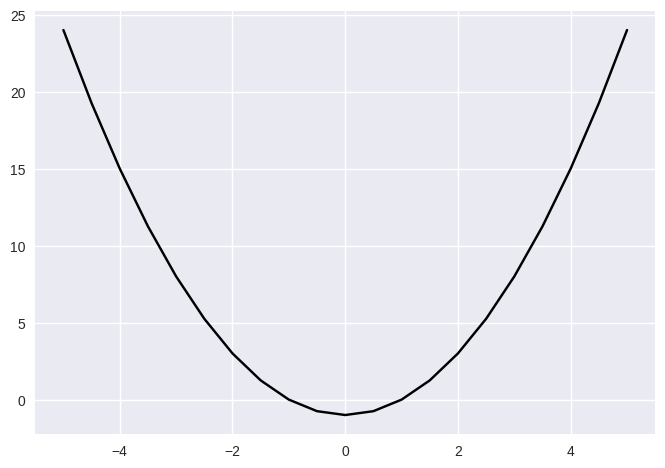

In [23]:
def practice_function(x):
    return x**2-1

x = np.arange(-5,5.5,0.5)
plt.plot(x,practice_function(x), color = 'black', ms = 3);

Let's say we want to graph our example function from class to explain the bisection method:

$$y=x^6-x-1$$

<!-- BEGIN QUESTION -->

**Question 4.** Write a python function for $y=x^6-x-1$ and sketch the graph over the interval $[-1,1]$.

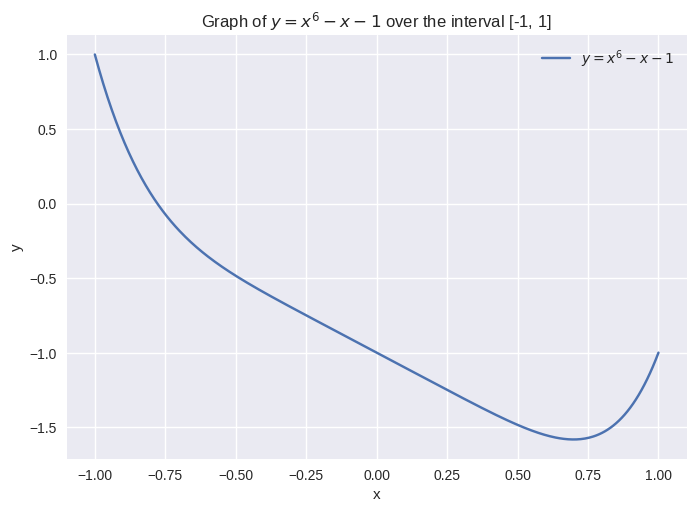

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return x**6 - x - 1


x_values = np.linspace(-1, 1, 400)
y_values = function(x_values)

# Plot the graph
plt.plot(x_values, y_values, label='$y = x^6 - x - 1$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of $y = x^6 - x - 1$ over the interval [-1, 1]')
plt.grid(True)
plt.legend()
plt.show()

<!-- END QUESTION -->

This function is continuous over the interval $[-1, -0.5]$ and the Intermediate Value Theorem can be applied on the interval $[-1, -0.5]$, so we should be able to use the Bisection method to find the root on the interval. 

Before we proceed, let's make sure we know what the Bisection method is actually doing.

<!-- BEGIN QUESTION -->

**Question 5.** Explain the how the Bisection method works.

Knowing that the Intermediate Value Theorem says if the function is continuous over the interval [a,b] and the function has oposite signs over this interval, you can derive the Bisection Method. The Bisection Method basically uses f(a+b)/2, or the midpoint of the interval. If f(a+b)/2 is the same sign as f(a), then the new interval is [(a+b)/2, b], and if it is different, the interval becomes [a, f(a+b)/2]. This process repeats until [a-b] is the desired error, and midpoint is reported as approximate zero.

<!-- END QUESTION -->

Now let's implement the method and look at a table of values.

<!-- BEGIN QUESTION -->

**Question 6.** Run the code below to implement the Bisection method on the function $f(x)=x^6-x-1$.

**Notes:** 

- If $f(a)$ and $f(b)$ do not have opposite signs stop the loop, print the message "A root is not guaranteed in this interval.".

- Use a for loop and set the number of iterations to 25 (`iterations = 25`).

- The inputs should be the endpoints of the interval $a$ and $b$ as well as a level of tolerance (`tol = 1e-6`).

- If you do not reach the specified level of tolerance after 25 iterations then print the message "Level of tolerance not reached after 25 iterations." and return the value.

- If you reach the level of tolerance before 25 iterations stop the loop and return the value. A `break` statement can be used to end a loop. Click [here](https://www.geeksforgeeks.org/python-break-statement/) to read about how it is used.

In [25]:
def f(x):
    return x**6-x-1

def bisection_method(a, b, iterations = 25, tol = 1e-6):
    """
    Parameters
    ----------
    a, b:            The endpoints of the interval
    iterations = 25: Set the maximum number of iterations for the loop
    tol = 1e-6:      Set the level of tolerance for the distance between x_i and the midpoint
    
    Returns
    -------
    The approximation for the root
    """
    x_is = []
    print("{:<8} {:<30} {:<30} {:<30}".format('n','x_n','a','b'))
    
    if f(a)*f(b) >= 0:
        print("A root is not guaranteed in this interval.")
    
    for i in range(iterations):
        c = (a + b)/2.0
        x_is.append(c)
        print("{:<8} {:<30} {:<30} {:<30} ".format(i, c,a,b ))
        if f(a)*f(c) > 0:
            a = c
        else:
            b = c
            
        if abs(b - a) < tol:
            break
        elif i == iterations-1:
            print("\nLevel of tolerance not reached after 25 iterations.")
            break
        

    
    return c 

print("\nAnswer:\t", bisection_method(-1, -0.5))

n        x_n                            a                              b                             
0        -0.75                          -1                             -0.5                           
1        -0.875                         -1                             -0.75                          
2        -0.8125                        -0.875                         -0.75                          
3        -0.78125                       -0.8125                        -0.75                          
4        -0.765625                      -0.78125                       -0.75                          
5        -0.7734375                     -0.78125                       -0.765625                      
6        -0.77734375                    -0.78125                       -0.7734375                     
7        -0.779296875                   -0.78125                       -0.77734375                    
8        -0.7783203125                  -0.779296875                   -0.

#### Examining the Bisection Method

Feel free to experiment with the code above - try changing the initial interval, tolerance, and/or the maximum number of iterations. Study what's happening so you understand how Bisection Method works. Then answer the question below:

**Question 7.** What do you think are some of the strengths and weaknesses of the Bisection Method?

The Bisection Method is beneficial because it guarantees roots within the interval given the initial conditions are reached. It is simple to implement 

## 4. Submitting your work
You're done with Lab 03! Submit your work by doing the following:

* Save your notebook

* Restart the kernel and run all cells.

* Right-click the `lab03` file in the navigation pane, then click "download."

* Upload the file you just downloaded to the Lab 03 assignment to Gradescope for Grading.